In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

: 

In [2]:
data=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [3]:
data.rename(columns={'Award?':'Award','ID#':'ID'},inplace=True)
data.set_index('ID',inplace=True)

In [4]:
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [5]:
data.info() # No null values and all int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [6]:
data.describe()
#Need to transform the data, seems like big tail

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


Balance


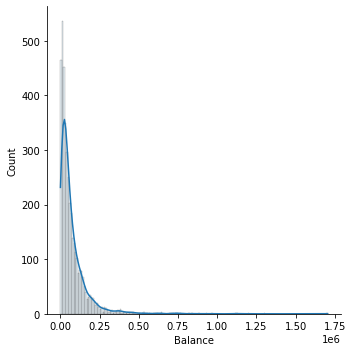

Qual_miles


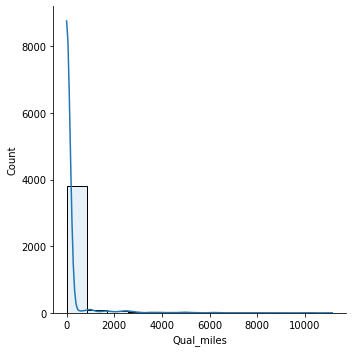

cc1_miles


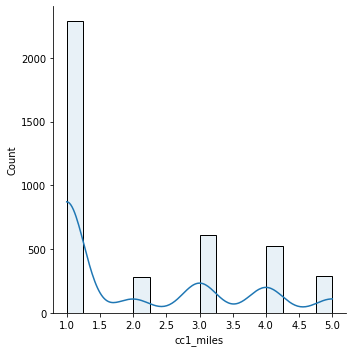

cc2_miles


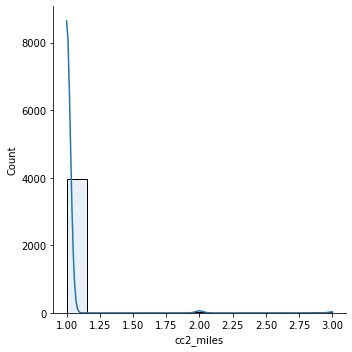

cc3_miles


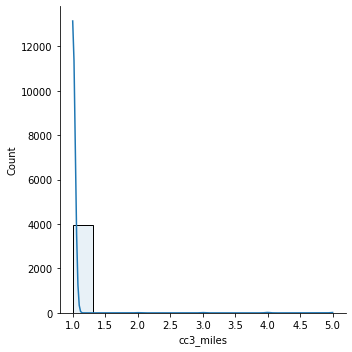

Bonus_miles


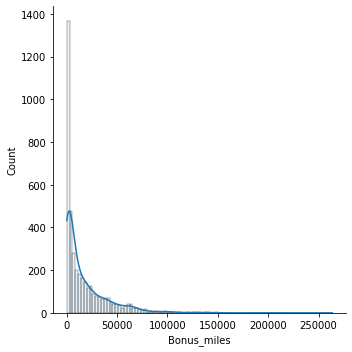

Bonus_trans


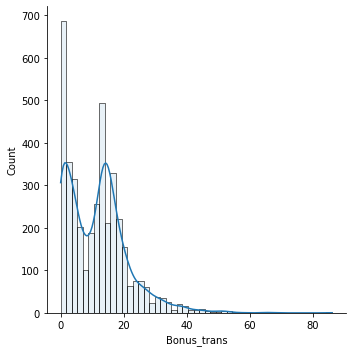

Flight_miles_12mo


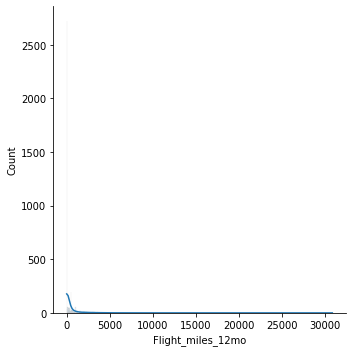

Flight_trans_12


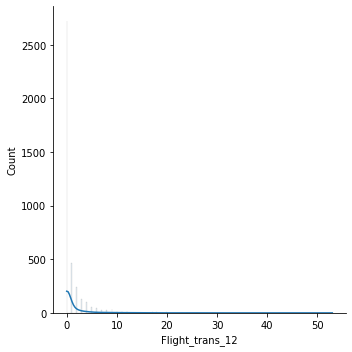

Days_since_enroll


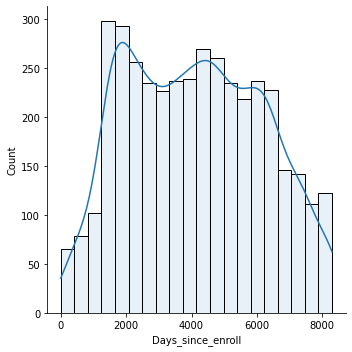

Award


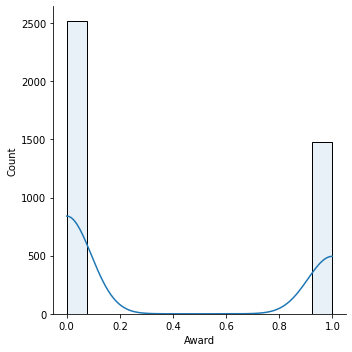

In [7]:
for n in data.columns:
    print(n)
    sns.displot(data[n],kde=True,alpha=0.1)
    plt.show()

In [8]:
for i in data.columns:
    if data[i].any()<0:
        print('yes')
    else:
        print('no')
#No Negative values inside the data

no
no
no
no
no
no
no
no
no
no
no


In [9]:
data[data.duplicated()]#There is one duplicate, lets keep the first occurance of the value and remove other

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
3899,1000,0,1,1,1,0,0,0,0,1597,0


In [10]:
data=data[~data.duplicated()]

In [11]:
data #3998 rows

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [12]:
corr_matrix=data.corr()

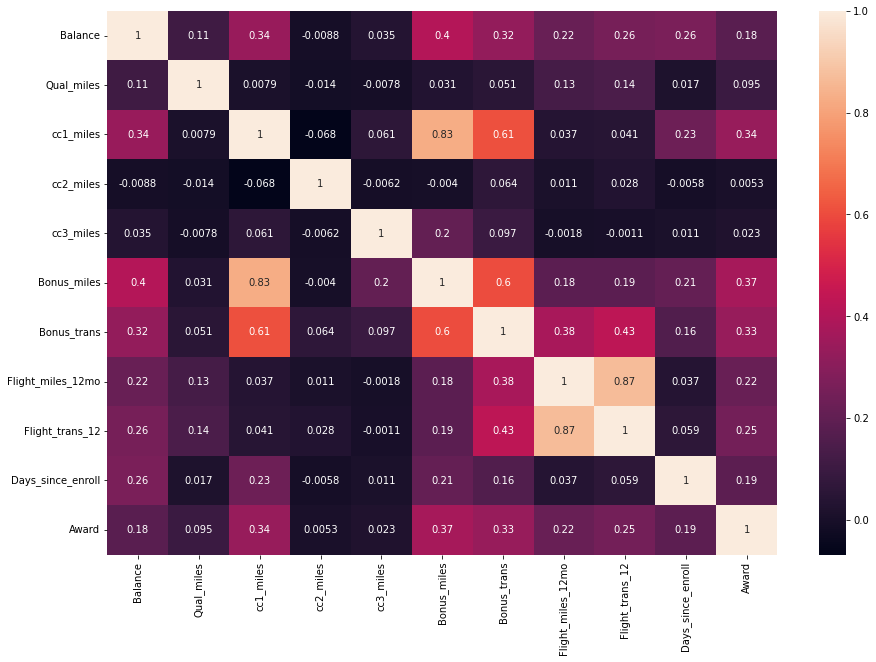

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,annot=True);

#### Bonus Miles and cc1_miles have some relation(of 0.83) which means that passangers who went bonus miles earned cc1 miles in freq prev 12 months
#### Most of others are close to 0 so we cant interpret much from them, what we can now do is target this column after we do our clustering[2,5]

In [14]:
def log_transform(X):
    return np.log1p(X)#deals with issue of log 0 which is not defined

In [15]:
Features=data.copy()

In [16]:
Features

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

log_transformer =FunctionTransformer(func=log_transform, validate=False)

In [18]:
preprocessing_pipeline = Pipeline([
    ('log_transform', log_transformer),
    ('scaler', StandardScaler())])
#It does log transformation then it does scaling,standard scalar on the data

In [19]:
preprocessed_data=preprocessing_pipeline.fit_transform(Features)

In [20]:
preprocessed_data

array([[-0.24151879, -0.24341522, -0.80991046, ..., -0.57662639,
         0.99083574, -0.76707163],
       [-0.53971113, -0.24341522, -0.80991046, ..., -0.57662639,
         0.9844826 , -0.76707163],
       [ 0.06042072, -0.24341522, -0.80991046, ..., -0.57662639,
         0.99755421, -0.76707163],
       ...,
       [ 0.512652  , -0.24341522,  0.86815955, ..., -0.57662639,
        -1.23831301,  1.30365921],
       [ 0.28269817, -0.24341522, -0.80991046, ...,  0.35000293,
        -1.23930179, -0.76707163],
       [-1.99346482, -0.24341522, -0.80991046, ..., -0.57662639,
        -1.24227238, -0.76707163]])

## Clustering

In [21]:
# Agglomerative
import scipy.cluster.hierarchy as sc
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA #To visualise the clusters in 2D


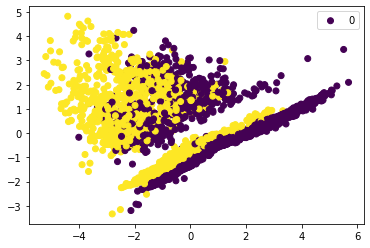

In [22]:
pca=PCA(n_components=2)
pca_scaled=pca.fit_transform(preprocessed_data)
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=data['Award'])
legend=[0]
plt.legend(legend)
plt.show()

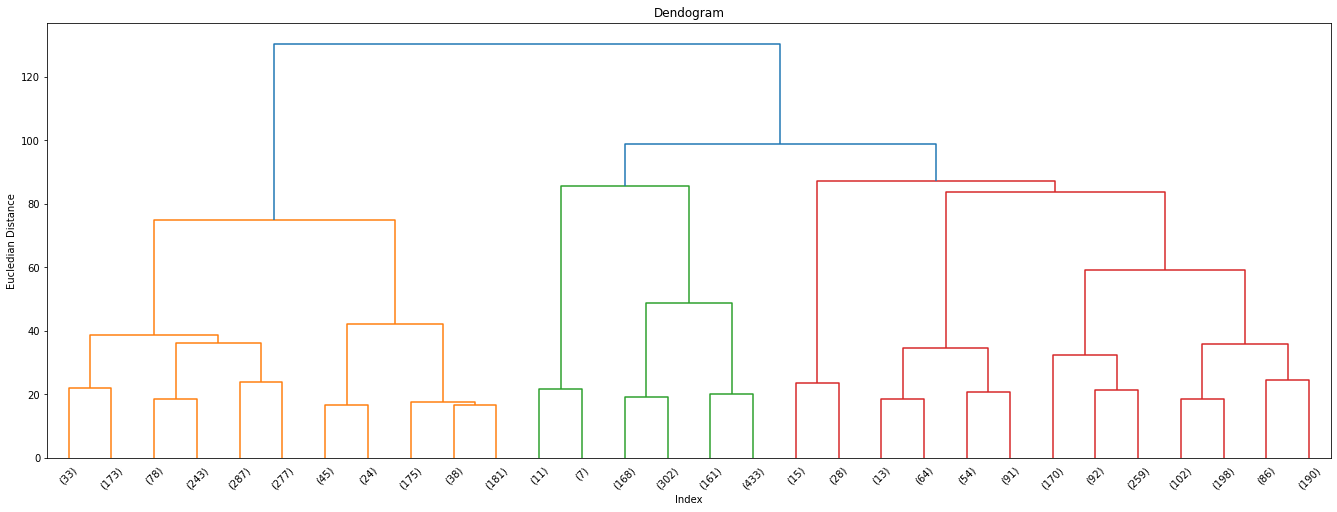

In [23]:
plt.figure(figsize=(23,8))
sc.dendrogram(sc.linkage(preprocessed_data,method='ward'),labels=data.index,truncate_mode='lastp')##truncated the linkage for diagram
plt.title('Dendogram')
plt.xlabel('Index')
plt.ylabel('Eucledian Distance');

In [24]:
from sklearn.metrics import silhouette_score

In [25]:
elbow=[]
for k in range(2,12):
    agglo=AgglomerativeClustering(n_clusters=k)
    agglo.fit(preprocessed_data)
    elbow.append(silhouette_score(preprocessed_data,agglo.labels_))

In [26]:
np.max(elbow),np.argmax(elbow)+2#+2 as we started from 2,12 range

(0.2962111576180066, 11)

In [27]:
agglo=AgglomerativeClustering(n_clusters=11)
agglo.fit_predict(preprocessed_data)
silhouette_score(preprocessed_data,agglo.labels_)

0.2962111576180066

## KMeans

In [28]:
WCSS=[]
from sklearn.cluster import KMeans
for i in np.arange(1,11):
    kmeans=KMeans(n_clusters=int(i),random_state=42)
    kmeans_labels=kmeans.fit(preprocessed_data)
    WCSS.append(kmeans_labels.inertia_)

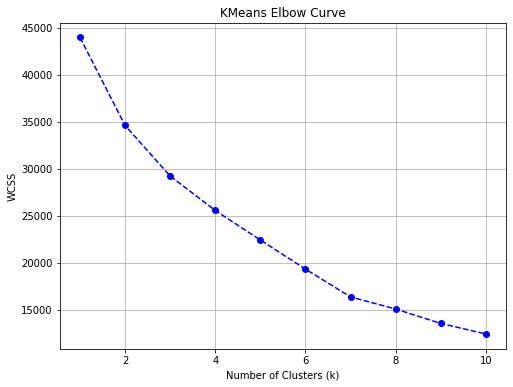

In [29]:
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1,11), WCSS, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('KMeans Elbow Curve')
plt.grid(True)
plt.show()
#6 clusters should be optimal

In [30]:
kmeans=KMeans(n_clusters=6,random_state=42)
kmeans_labels=kmeans.fit(preprocessed_data)
silhouette_score(preprocessed_data,kmeans_labels.labels_)


0.24210211238676718

In [31]:
pred_k=kmeans.predict(preprocessed_data)

In [32]:
np.unique(pred_k)#6 clusters

array([0, 1, 2, 3, 4, 5])

In [46]:
#DBSCAN
from sklearn.cluster import DBSCAN

In [94]:
final_pred=-1
for i in np.arange(1.0,2.0,0.01):
    for j in range(5,22):
        dbscan=DBSCAN(eps=float(i),min_samples=j)
        pred_db=dbscan.fit_predict(preprocessed_data)
        s=silhouette_score(preprocessed_data, pred_db)
        if (s>=final_pred):
            final_pred=s
        else:
            continue

In [96]:
final_pred#best silhouette_score score 

0.2355798839070392

In [85]:
get_scorer_names()=='silhouette'
#No grid search 

False

0.2355798839070392